# Importar las bibliotecas necesarias
Importar las bibliotecas necesarias para el análisis de datos y el aprendizaje automático.

PUNTO DE PARTIDA
 
En primer lugar se os facilitarán tres bases de datos:
 
    La primera contiene, para un conjunto de ID's, la información histórica de pagos (o impagos) de cuotas de primas de seguro contratados con una entidad aseguradora; esta información se presenta en series históricas de entre 1 y 60 meses.
    La segunda tabla contiene información cualitativa para una serie de ID's.
    La tercera contiene la dirección completa, código postal y estado dentro de los Estados Unidos.
 
Os enfrentáis al siguiente reto...
 
A través de los datos anteriormente comentados, ¿se puede otorgar un fraccionamiento de prima gratuito?
 
Debéis asumir que de estos clientes nuevos se dispondrá de la misma información cualitativa presente en la base de datos del reto.
 
El texto está en español y se trata de una introducción a un reto de aprendizaje automático. El reto consiste en predecir si un cliente nuevo es elegible para un fraccionamiento de prima gratuito. Los datos disponibles para el reto son tres bases de datos:
 
    La primera base de datos contiene información histórica de pagos de primas de seguros.
    La segunda base de datos contiene información cualitativa sobre los clientes.
    La tercera base de datos contiene información sobre la ubicación de los clientes.
 
El reto es predecir si un cliente nuevo es elegible para un fraccionamiento de prima gratuito a través de los datos disponibles. Se asume que los clientes nuevos tendrán la misma información cualitativa que los clientes que se encuentran en la base de datos del reto.
 
 
¿Cuál es el camino a seguir en la resolución del caso?
 
Entendimiento del problema y dataset.
 
    Tenéis ante vosotros un problema que resolver. Para ello contáis con un conjunto de datos que os ayudará a resolverlo.
 
Proceso de data treatment and cleansing.
 
    En este segundo paso, deberéis preparar los datos para aplicar el modelo elegido. Incluyendo la limpieza de datos erróneos, outliers, cambio de formatos, unión entre tablas y otras casuísticas que puedan causar fallos en el modelo.
 
Proceso de data analysis y visualización.
 
    En este proceso, se exigirá una presentación del análisis preliminar de los datos. primeras conclusiones del dataset, así como una visualización de las diferentes variables que den contexto a cómo se abordarà el problema a resolver.
 
Proceso de data modelling y análisis.
 
    En este paso se aplicará un modelo sobre el dataset que permita hacer o bien, una clasificación de los datos para dar respuesta al problema o una predicción a futuro de los eventos a analizar.
 
Obtención de resultados, visualización y conclusiones.
 
    Debéis obtener conclusiones, respuestas al problema y visualización de los resultados, así como el mensaje a transmitir.

In [145]:
# Importar la biblioteca pandas para el manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report




In [219]:
pd.set_option('display.max_columns', None)

# Cargar y explorar el conjunto de datos


In [146]:
# Cargamos el conjunto de datos
adress = pd.read_csv('/Users/ignaciolazarovalganon/Downloads/PROYECTOS_BOOTCAMP/Prueba_tecnica/datos/address.csv')
main = pd.read_csv('/Users/ignaciolazarovalganon/Downloads/PROYECTOS_BOOTCAMP/Prueba_tecnica/datos/main.csv')
paid_record = pd.read_csv('/Users/ignaciolazarovalganon/Downloads/PROYECTOS_BOOTCAMP/Prueba_tecnica/datos/paid_record.csv')

### ADRESS

In [147]:
# Este primer DataFrame contiene la información sobre la dirección de los clientes 
print(adress.info())
adress.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438757 entries, 0 to 438756
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   New_ID   438757 non-null  object
 1   ADDRESS  438757 non-null  object
dtypes: object(2)
memory usage: 6.7+ MB
None


,New_ID,ADDRESS
0,5008804L,"06042, CT, 31 Mitchell Road"
1,5008805G,"72703, AR, 1189 Northwest End Avenue"
2,5008806D,"72701, AR, 218 Shipley Alley"
3,5008808I,"3138 P Street Northwest, 20007, DC"
4,5008809Z,"2405 230th Street, 21122, MD"


In [148]:
adress['ID']= adress['New_ID'].str[:7]
adress['Letter']= adress['New_ID'].str[7]
adress.drop('New_ID', axis=1, inplace=True)

In [149]:
adress.head()

,ADDRESS,ID,Letter
0,"06042, CT, 31 Mitchell Road",5008804,L
1,"72703, AR, 1189 Northwest End Avenue",5008805,G
2,"72701, AR, 218 Shipley Alley",5008806,D
3,"3138 P Street Northwest, 20007, DC",5008808,I
4,"2405 230th Street, 21122, MD",5008809,Z


### MAIN

In [150]:
main = pd.read_csv('/Users/ignaciolazarovalganon/Downloads/PROYECTOS_BOOTCAMP/Prueba_tecnica/datos/main.csv')

In [151]:
#  En este DataFrame encontramos información cualitativa sobre los clientes.
print(main.info())
main.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438757 entries, 0 to 438756
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          427894 non-null  object 
 1   FLAG_OWN_CAR         427705 non-null  object 
 2   FLAG_OWN_REALTY      427806 non-null  object 
 3   CNT_CHILDREN         427826 non-null  float64
 4   AMT_INCOME_TOTAL     427624 non-null  float64
 5   NAME_INCOME_TYPE     427718 non-null  object 
 6   NAME_EDUCATION_TYPE  427654 non-null  object 
 7   NAME_FAMILY_STATUS   427772 non-null  object 
 8   NAME_HOUSING_TYPE    427693 non-null  object 
 9   DAYS_EMPLOYED        427784 non-null  float64
 10  FLAG_MOBIL           427690 non-null  float64
 11  FLAG_WORK_PHONE      427715 non-null  float64
 12  FLAG_PHONE           427674 non-null  float64
 13  FLAG_EMAIL           427770 non-null  float64
 14  OCCUPATION_TYPE      296952 non-null  object 
 15  CNT_FAM_MEMBERS  

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_BIRTH_CLEAN,Letter,Main_ID
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,L,5008804
1,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,09/04/1990,G,5008805
2,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,06/05/1964,D,5008806
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,I,5008808
4,F,NaN,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,26/10/1970,Z,5008809


In [152]:
print(main['FLAG_MOBIL'].value_counts())
print(main['FLAG_WORK_PHONE'].value_counts())
print(main['FLAG_PHONE'].value_counts())

1.0    427690
Name: FLAG_MOBIL, dtype: int64
0.0    339555
1.0     88160
Name: FLAG_WORK_PHONE, dtype: int64
0.0    304574
1.0    123100
Name: FLAG_PHONE, dtype: int64


In [153]:
from datetime import datetime

# Primero de todos vamos a arreglar el tipo de dato de la columna DAYS_BIRTH_CLEAN que es un object y lo vamos a pasar a datetime
main['BIRTH'] = pd.to_datetime(main['DAYS_BIRTH_CLEAN'], format='%d/%m/%Y')
main.drop(['DAYS_BIRTH_CLEAN'], axis=1, inplace=True)

CODE_GENDER             2.475858
FLAG_OWN_CAR            2.518934
FLAG_OWN_REALTY         2.495915
CNT_CHILDREN            2.491356
AMT_INCOME_TOTAL        2.537395
NAME_INCOME_TYPE        2.515971
NAME_EDUCATION_TYPE     2.530558
NAME_FAMILY_STATUS      2.503664
NAME_HOUSING_TYPE       2.521669
DAYS_EMPLOYED           2.500929
FLAG_MOBIL              2.522353
FLAG_WORK_PHONE         2.516655
FLAG_PHONE              2.526000
FLAG_EMAIL              2.504120
OCCUPATION_TYPE        32.319712
CNT_FAM_MEMBERS         2.492040
Letter                  0.000000
Main_ID                 0.000000
BIRTH                   2.442126
dtype: float64


<Axes: >

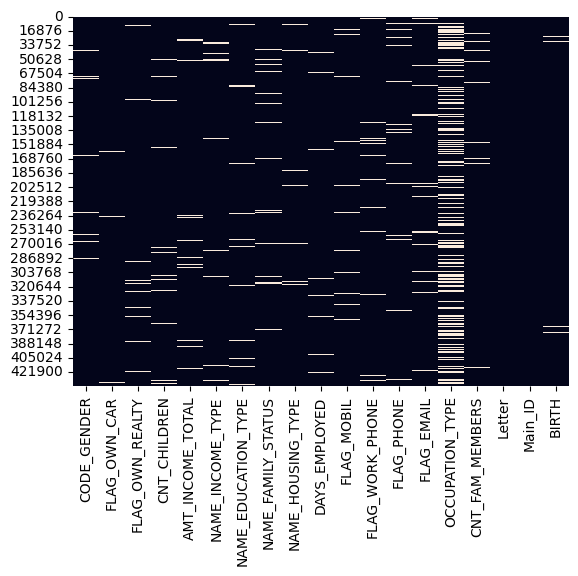

In [154]:
# Comprobamos los datos faltantes y observamos que en todas las columnas hay alrededor de un 2.5% de datos faltantes, 
# en cambio, en la columna OCCUPATION_TYPE hay un 31% de datos faltantes. La estudiaremos con más detenimiento más adelante.

missing_percentage = main.isnull().sum() / len(main) * 100
print(missing_percentage)
sns.heatmap(main.isnull(), cbar=False)

In [155]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Imputamos Nan usando IterativeImputer
imputer = IterativeImputer(random_state=0)
numeric_cols = main.select_dtypes(include=np.number).columns.tolist()
main[numeric_cols] = imputer.fit_transform(main[numeric_cols])


In [156]:
# Utilizamos el método ffill, que rellena los valores faltantes con el valor anterior, para rellenar 
# los datos faltantes y no la moda para no alterar la distribución de los datos.
object_cols = main.select_dtypes(include=object).columns.drop('OCCUPATION_TYPE')
main[object_cols] = main[object_cols].fillna(method='ffill')

In [157]:
# Para la columna OCCUPATION_TYPE vamos a imputar a los valors Nan el str Unkonwn, ya que que no podemos eliminar tantas filas
# y no podemos imputar con la moda porque no hay una moda clara en esta columna.
main['OCCUPATION_TYPE'] = main['OCCUPATION_TYPE'].fillna('Unknown')

In [158]:
main.dropna(inplace=True)

In [159]:
main.isna().sum()

CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE            0
CNT_FAM_MEMBERS            0
Letter                     0
Main_ID                    0
BIRTH                  10715
dtype: int64

In [160]:
# Eliminamos los Nan restantes de la columna Birth
main.dropna(inplace=True)

In [161]:
missing_percentage = main.isna().sum() / len(main) * 100
missing_percentage

CODE_GENDER            0.0
FLAG_OWN_CAR           0.0
FLAG_OWN_REALTY        0.0
CNT_CHILDREN           0.0
AMT_INCOME_TOTAL       0.0
NAME_INCOME_TYPE       0.0
NAME_EDUCATION_TYPE    0.0
NAME_FAMILY_STATUS     0.0
NAME_HOUSING_TYPE      0.0
DAYS_EMPLOYED          0.0
FLAG_MOBIL             0.0
FLAG_WORK_PHONE        0.0
FLAG_PHONE             0.0
FLAG_EMAIL             0.0
OCCUPATION_TYPE        0.0
CNT_FAM_MEMBERS        0.0
Letter                 0.0
Main_ID                0.0
BIRTH                  0.0
dtype: float64

In [162]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428042 entries, 0 to 438756
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CODE_GENDER          428042 non-null  object        
 1   FLAG_OWN_CAR         428042 non-null  object        
 2   FLAG_OWN_REALTY      428042 non-null  object        
 3   CNT_CHILDREN         428042 non-null  float64       
 4   AMT_INCOME_TOTAL     428042 non-null  float64       
 5   NAME_INCOME_TYPE     428042 non-null  object        
 6   NAME_EDUCATION_TYPE  428042 non-null  object        
 7   NAME_FAMILY_STATUS   428042 non-null  object        
 8   NAME_HOUSING_TYPE    428042 non-null  object        
 9   DAYS_EMPLOYED        428042 non-null  float64       
 10  FLAG_MOBIL           428042 non-null  float64       
 11  FLAG_WORK_PHONE      428042 non-null  float64       
 12  FLAG_PHONE           428042 non-null  float64       
 13  FLAG_EMAIL    

In [163]:
main.rename(columns={'Main_ID': 'ID'}, inplace=True)

In [164]:
main['NAME_INCOME_TYPE'].value_counts()

Working                 220653
Commercial associate     98436
Pensioner                73618
State servant            35317
Student                     18
Name: NAME_INCOME_TYPE, dtype: int64

In [165]:
income_type =main.groupby(['NAME_INCOME_TYPE', 'OCCUPATION_TYPE']).size().reset_index()
income_type

,NAME_INCOME_TYPE,OCCUPATION_TYPE,0
0,Commercial associate,Accountants,5907
1,Commercial associate,Cleaning staff,1104
2,Commercial associate,Cooking staff,1764
3,Commercial associate,Core staff,9007
4,Commercial associate,Drivers,6391
...,...,...,...
73,Working,Sales staff,25627
74,Working,Secretaries,1101
75,Working,Security staff,5397
76,Working,Unknown,39735


In [166]:
income_type[income_type['NAME_INCOME_TYPE']=='Pensioner']

,NAME_INCOME_TYPE,OCCUPATION_TYPE,0
19,Pensioner,Accountants,26
20,Pensioner,Cleaning staff,6
21,Pensioner,Cooking staff,10
22,Pensioner,Core staff,74
23,Pensioner,Drivers,32
24,Pensioner,HR staff,2
25,Pensioner,High skill tech staff,29
26,Pensioner,Laborers,106
27,Pensioner,Low-skill Laborers,4
28,Pensioner,Managers,48


In [167]:
unknown = income_type[income_type['OCCUPATION_TYPE'] == 'Unknown']
unknown

,NAME_INCOME_TYPE,OCCUPATION_TYPE,0
17,Commercial associate,Unknown,18535
35,Pensioner,Unknown,73195
54,State servant,Unknown,6812
58,Student,Unknown,7
76,Working,Unknown,39735


In [168]:
main['OCCUPATION_TYPE'].value_counts()

Unknown                  138284
Laborers                  74545
Core staff                41037
Sales staff               39059
Managers                  33786
Drivers                   24834
High skill tech staff     16418
Accountants               15242
Medicine staff            12878
Cooking staff              7676
Security staff             7599
Cleaning staff             5547
Private service staff      3273
Low-skill Laborers         2045
Secretaries                1947
Waiters/barmen staff       1574
Realty agents               984
HR staff                    744
IT staff                    570
Name: OCCUPATION_TYPE, dtype: int64

In [169]:
# Para estudiar la relación de las variables con la profesión de los clientes vamos a utilizar 
# la columna NAME_INCOME_TYPE, ya que OCCUPATION_TYPE tiene muchos valores faltantes.

### PAID RECORD

In [170]:
# aquí veremos que estos datos contienen información histórica de pagos de primas de seguros.
print(paid_record.info())
paid_record.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
None


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [171]:
print(paid_record['MONTHS_BALANCE'].value_counts())


-1     34436
-2     34209
 0     33856
-3     33854
-4     33365
       ...  
-56     2109
-57     1649
-58     1255
-59      820
-60      415
Name: MONTHS_BALANCE, Length: 61, dtype: int64


In [172]:
print(paid_record['STATUS'].value_counts())

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64


In [173]:
main

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Letter,ID,BIRTH
0,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.000000,0.0,Unknown,2.0,L,5008804.0,1990-04-09
1,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.0,1.0,1.0,0.000000,0.0,Unknown,2.0,G,5008805.0,1990-04-09
2,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.0,1.0,0.0,0.000000,0.0,Security staff,2.0,D,5008806.0,1964-05-06
3,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.000000,1.0,Sales staff,1.0,I,5008808.0,1970-10-26
4,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.0,1.0,0.0,1.000000,1.0,Sales staff,1.0,Z,5008809.0,1970-10-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438752,F,N,N,1.0,130500.0,Working,Secondary / secondary special,Separated,With parents,-3331.0,1.0,1.0,0.000000,0.0,Sales staff,2.0,X,6153574.0,1991-06-04
438753,F,Y,Y,0.0,180000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-5941.0,1.0,0.0,0.206275,0.0,Unknown,2.0,V,6153575.0,1978-01-05
438754,F,N,Y,0.0,148500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-880.0,1.0,0.0,0.000000,0.0,Sales staff,2.0,J,6153576.0,1974-03-07
438755,M,N,Y,0.0,180000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-885.0,1.0,1.0,0.000000,0.0,Laborers,2.0,S,6153578.0,1965-03-08


In [174]:
adress

,ADDRESS,ID,Letter
0,"06042, CT, 31 Mitchell Road",5008804,L
1,"72703, AR, 1189 Northwest End Avenue",5008805,G
2,"72701, AR, 218 Shipley Alley",5008806,D
3,"3138 P Street Northwest, 20007, DC",5008808,I
4,"2405 230th Street, 21122, MD",5008809,Z
...,...,...,...
438752,"37080, TN, 7730 Wilkinson Road",5680433,NaN
438753,"2815 Saint Edwards Drive, 37211, TN",5353755,NaN
438754,"85306, AZ, 5434 West Beck Lane",5689895,NaN
438755,"05641, VT, 21 Hill Street",5833391,NaN


- MONTHS_BALANCE: Número de meses transcurridos desde que se registró la cuenta de crédito, 0 indica actual mes, -1 mes anterior etc
- STATUS:
    - C : CLiente nuevo
    - 0: No elegible
    - X: Pendiente de revisión
    - 1: Elegible
    - 2: Elegible con condiciones
    - 3: Elegible con descuento
    - 4: Elegible con un plazo de pago más largo
    - 5: Elegible con un seguro adicional 



In [189]:
# Vamos a tomar como referencia el mes actual:0 para quedarnos con los datos más recientes y eliminamos los que tengan como status=0 ya que no son eligibles    
paid_record_actual = paid_record[paid_record['MONTHS_BALANCE'] == 0]
paid_record_actual = paid_record_actual[paid_record_actual['STATUS'] != '0']

In [190]:
paid_record_actual

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
4,5001712,0,C
23,5001713,0,X
45,5001714,0,X
60,5001715,0,X
...,...,...,...
1048416,5150479,0,C
1048451,5150481,0,X
1048512,5150483,0,X
1048530,5150484,0,C


C    17613
X     6925
1      309
5       65
2       19
3        6
4        5
Name: STATUS, dtype: int64


<Axes: >

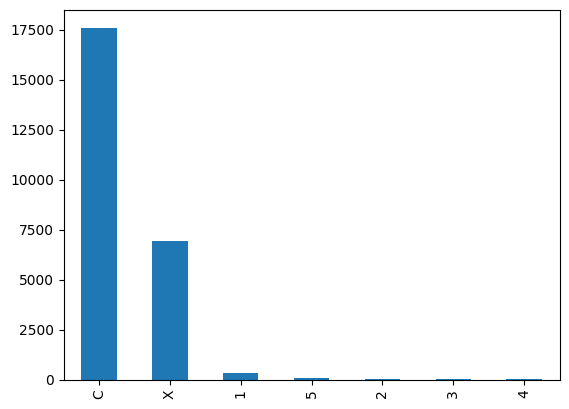

In [191]:
# Vamos a clasificar a los cliente en función de STATUS
print(paid_record_actual['STATUS'].value_counts())
paid_record_actual['STATUS'].value_counts().plot(kind='bar')

In [194]:
paid_record_actual.shape

(24942, 3)

In [192]:
# Hacemos un merge el df paid_record_actual con el df main para tener toda la información junta
main_paid_record_actual = pd.merge(paid_record_actual,main, how='left', on='ID')  

In [196]:
main_paid_record_actual.drop_duplicates(subset='ID', keep='first', inplace=True)

In [199]:
main_paid_record_actual

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Letter,BIRTH
0,5001711,0,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,5001712,0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,5001713,0,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,5001714,0,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,5001715,0,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25006,5150479,0,C,F,N,N,0.000000,90000.0,Working,Higher education,...,With parents,-128.0,1.0,0.0,0.0,0.0,Unknown,2.0,O,1989-02-24
25007,5150481,0,X,F,Y,Y,1.000000,157500.0,Working,Secondary / secondary special,...,House / apartment,-1739.0,1.0,0.0,0.0,0.0,Core staff,3.0,K,1993-07-19
25008,5150483,0,X,F,Y,Y,1.000000,157500.0,Working,Secondary / secondary special,...,House / apartment,-1739.0,1.0,0.0,0.0,0.0,Core staff,3.0,D,1993-07-19
25009,5150484,0,C,F,Y,Y,1.025473,157500.0,Working,Secondary / secondary special,...,House / apartment,-1739.0,1.0,0.0,0.0,0.0,Core staff,3.0,B,1993-07-19


In [214]:
# Para nuestro análisis vamos a quedarnos con aquellos clientes cuyas variables tenemos la información completa para que no haya sesgo en el análisis.
# Aquellos clientes que tengan algún valor faltante en alguna de las variables que vamos a utilizar los eliminamos.
main_paid_record_actual.dropna(inplace=True)
main_paid_record_actual.reset_index(drop=True, inplace=True)


,level_0,index,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,...,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Letter,BIRTH
0,0,2451,5008804,0,C,M,Y,Y,0.000000,427500.0,...,Rented apartment,-4542.000000,1.0,1.0,0.0,0.0,Unknown,2.0,L,1990-04-09
1,1,2453,5008805,0,C,M,Y,Y,0.000000,427500.0,...,Rented apartment,-4542.000000,1.0,1.0,0.0,0.0,Unknown,2.0,G,1990-04-09
2,2,2455,5008806,0,C,M,Y,Y,0.000000,112500.0,...,House / apartment,-1134.000000,1.0,0.0,0.0,0.0,Security staff,2.0,D,1964-05-06
3,3,2457,5008810,0,C,F,N,Y,0.000000,270000.0,...,House / apartment,-3051.000000,1.0,0.0,1.0,1.0,Sales staff,1.0,C,1970-10-26
4,4,2459,5008811,0,C,F,N,Y,0.000000,270000.0,...,House / apartment,45669.832967,1.0,0.0,1.0,1.0,Sales staff,1.0,J,1970-10-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17380,17380,25005,5150478,0,C,M,Y,Y,0.000000,202500.0,...,House / apartment,-1315.000000,1.0,1.0,0.0,0.0,Laborers,2.0,C,1993-05-02
17381,17381,25006,5150479,0,C,F,N,N,0.000000,90000.0,...,With parents,-128.000000,1.0,0.0,0.0,0.0,Unknown,2.0,O,1989-02-24
17382,17382,25007,5150481,0,X,F,Y,Y,1.000000,157500.0,...,House / apartment,-1739.000000,1.0,0.0,0.0,0.0,Core staff,3.0,K,1993-07-19
17383,17383,25008,5150483,0,X,F,Y,Y,1.000000,157500.0,...,House / apartment,-1739.000000,1.0,0.0,0.0,0.0,Core staff,3.0,D,1993-07-19


# Análisis exploratorio de datos (EDA)
Realizar un análisis exploratorio de los datos para entender las relaciones y patrones en los datos.

In [220]:
main_paid_record_actual

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Letter,BIRTH
0,5008804,0,C,M,Y,Y,0.000000,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.000000,1.0,1.0,0.0,0.0,Unknown,2.0,L,1990-04-09
1,5008805,0,C,M,Y,Y,0.000000,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542.000000,1.0,1.0,0.0,0.0,Unknown,2.0,G,1990-04-09
2,5008806,0,C,M,Y,Y,0.000000,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134.000000,1.0,0.0,0.0,0.0,Security staff,2.0,D,1964-05-06
3,5008810,0,C,F,N,Y,0.000000,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051.000000,1.0,0.0,1.0,1.0,Sales staff,1.0,C,1970-10-26
4,5008811,0,C,F,N,Y,0.000000,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,45669.832967,1.0,0.0,1.0,1.0,Sales staff,1.0,J,1970-10-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17380,5150478,0,C,M,Y,Y,0.000000,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-1315.000000,1.0,1.0,0.0,0.0,Laborers,2.0,C,1993-05-02
17381,5150479,0,C,F,N,N,0.000000,90000.0,Working,Higher education,Married,With parents,-128.000000,1.0,0.0,0.0,0.0,Unknown,2.0,O,1989-02-24
17382,5150481,0,X,F,Y,Y,1.000000,157500.0,Working,Secondary / secondary special,Married,House / apartment,-1739.000000,1.0,0.0,0.0,0.0,Core staff,3.0,K,1993-07-19
17383,5150483,0,X,F,Y,Y,1.000000,157500.0,Working,Secondary / secondary special,Married,House / apartment,-1739.000000,1.0,0.0,0.0,0.0,Core staff,3.0,D,1993-07-19


- MONTHS_BALANCE: Número de meses transcurridos desde que se registró la cuenta de crédito, 0 indica actual mes, -1 mes anterior etc
- STATUS:
    - C : CLiente nuevo
    - 0: No elegible
    - X: Pendiente de revisión
    - 1: Elegible
    - 2: Elegible con condiciones
    - 3: Elegible con descuento
    - 4: Elegible con un plazo de pago más largo
    - 5: Elegible con un seguro adicional 

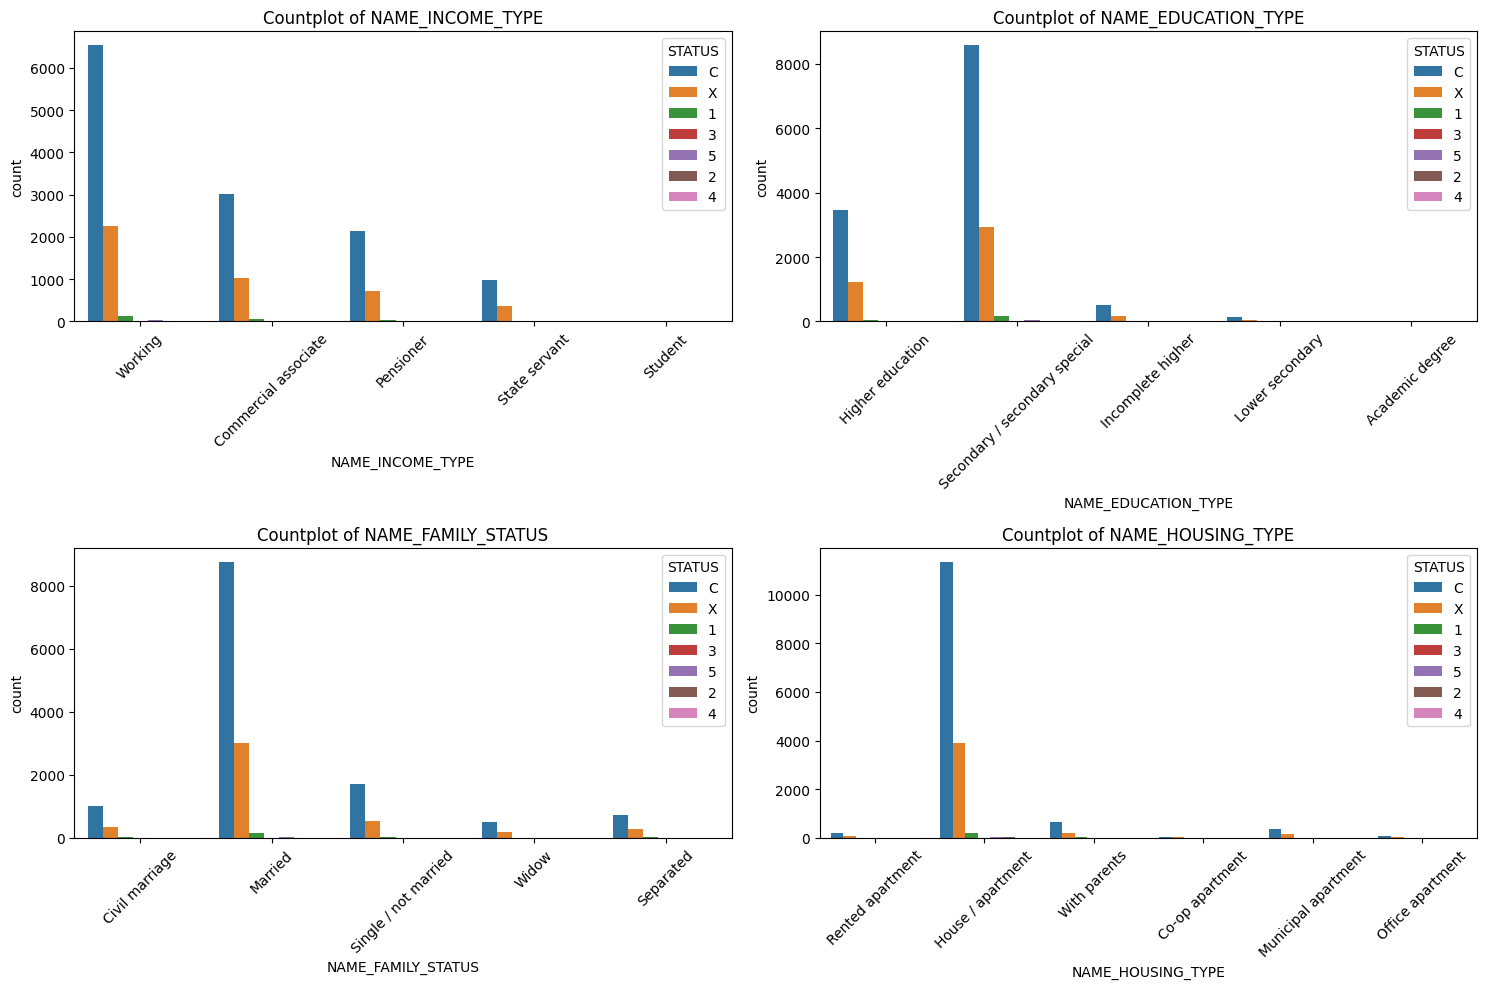

In [224]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))


sns.countplot(x='NAME_INCOME_TYPE', hue='STATUS', data=main_paid_record_actual, ax=ax[0, 0])
sns.countplot(x='NAME_EDUCATION_TYPE', hue='STATUS', data=main_paid_record_actual, ax=ax[0, 1])
sns.countplot(x='NAME_FAMILY_STATUS', hue='STATUS', data=main_paid_record_actual, ax=ax[1, 0])
sns.countplot(x='NAME_HOUSING_TYPE', hue='STATUS', data=main_paid_record_actual, ax=ax[1, 1])

ax[0, 0].set_title('Countplot of NAME_INCOME_TYPE')
ax[0, 1].set_title('Countplot of NAME_EDUCATION_TYPE')
ax[1, 0].set_title('Countplot of NAME_FAMILY_STATUS')
ax[1, 1].set_title('Countplot of NAME_HOUSING_TYPE')

ax[0, 0].tick_params(axis='x', labelrotation=45)
ax[0, 1].tick_params(axis='x', labelrotation=45)    
ax[1, 0].tick_params(axis='x', labelrotation=45)
ax[1, 1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show();



# Preprocesamiento de datos para el aprendizaje automático
Preprocesar los datos para el aprendizaje automático, incluyendo la codificación de variables categóricas, la normalización de características, etc.

In [244]:
#Hacemos una copia del df para no modificar el original
main_paid_record_actual_copy = main_paid_record_actual.copy()

In [245]:
main_paid_record_actual_copy.drop(['MONTHS_BALANCE', 'DAYS_EMPLOYED','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE','Letter'], axis=1, inplace=True)

In [246]:
main_paid_record_actual['STATUS'].value_counts()    

C    12686
X     4380
1      232
5       57
2       19
3        6
4        5
Name: STATUS, dtype: int64

In [248]:
main_paid_record_actual_copy['STATUS'].replace({'X':0,'C':6}, inplace=True)

In [249]:
main_paid_record_actual_copy['STATUS'].value_counts()    

6    12686
0     4380
1      232
5       57
2       19
3        6
4        5
Name: STATUS, dtype: int64

In [250]:
#Vamos a pasar un Encoder a las variables categóricas para poder utilizarlas en el modelo de Machine Learning
le = preprocessing.LabelEncoder()   
main_paid_record_actual_copy['NAME_INCOME_TYPE'] = le.fit_transform(main_paid_record_actual['NAME_INCOME_TYPE'])
main_paid_record_actual_copy['NAME_EDUCATION_TYPE'] = le.fit_transform(main_paid_record_actual['NAME_EDUCATION_TYPE'])
main_paid_record_actual_copy['NAME_FAMILY_STATUS'] = le.fit_transform(main_paid_record_actual['NAME_FAMILY_STATUS'])
main_paid_record_actual_copy['NAME_HOUSING_TYPE'] = le.fit_transform(main_paid_record_actual['NAME_HOUSING_TYPE'])
main_paid_record_actual_copy['CODE_GENDER'] = le.fit_transform(main_paid_record_actual['CODE_GENDER'])
main_paid_record_actual_copy['FLAG_OWN_CAR'] = le.fit_transform(main_paid_record_actual['CODE_GENDER'])
main_paid_record_actual_copy['FLAG_OWN_REALTY'] = le.fit_transform(main_paid_record_actual['CODE_GENDER'])


In [251]:
main_paid_record_actual_copy.head()

,ID,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,BIRTH
0,5008804,6,1,1,1,0.0,427500.0,4,1,0,4,2.0,1990-04-09
1,5008805,6,1,1,1,0.0,427500.0,4,1,0,4,2.0,1990-04-09
2,5008806,6,1,1,1,0.0,112500.0,4,4,1,1,2.0,1964-05-06
3,5008810,6,0,0,0,0.0,270000.0,0,4,3,1,1.0,1970-10-26
4,5008811,6,0,0,0,0.0,270000.0,0,4,3,1,1.0,1970-10-26


/var/folders/wx/89cqn4pd7sj7hylxyj59ftk00000gn/T/ipykernel_3052/2190336112.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(main_paid_record_actual_copy.corr(), annot=True, cmap='coolwarm')


<Axes: >

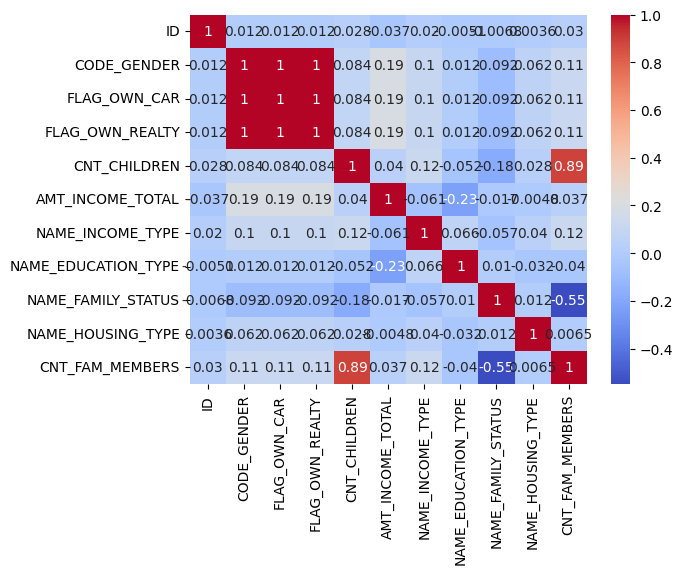

In [252]:
# Correlación entre variables   
sns.heatmap(main_paid_record_actual_copy.corr(), annot=True, cmap='coolwarm')

In [ ]:
# Preprocesamiento de datos para el aprendizaje automático

# Normalizar las características numéricas para que tengan una media de 0 y una desviación estándar de 1
scaler = preprocessing.StandardScaler()
for column in main_paid_record_actual_copy.select_dtypes(include=[np.number]).columns:
    main_paid_record_actual_copy[column] = scaler.fit_transform(main_paid_record_actual_copy[[column]])

# Mostrar las primeras 5 filas del DataFrame después de la normalización
print(main_paid_record_actual_copy.head())

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
# Supongamos que 'target' es nuestra variable objetivo
X = main_paid_record_actual_copy.drop('target', axis=1)
y = main_paid_record_actual_copy['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las formas de los conjuntos de entrenamiento y prueba para verificar la división
print('X_train shape:', repr(X_train.shape))
print('y_train shape:', repr(y_train.shape))
print('X_test shape:', repr(X_test.shape))
print('y_test shape:', repr(y_test.shape))


# Entrenamiento del modelo de aprendizaje automático
Entrenar un modelo de aprendizaje automático en el conjunto de datos preprocesado.

In [ ]:
# Entrenamiento del modelo de aprendizaje automático

# Crear una instancia del modelo
# En este caso, usaremos la regresión logística, pero puedes cambiarlo a cualquier otro modelo de aprendizaje automático
model = LogisticRegression()

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)

# Mostrar la matriz de confusión para entender el rendimiento del modelo
cm = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(cm)

# Mostrar el informe de clasificación para entender el rendimiento del modelo
cr = classification_report(y_test, y_pred)
print('Informe de clasificación:')
print(cr)


# Evaluación del modelo
Evaluar el rendimiento del modelo de aprendizaje automático utilizando métricas apropiadas.

In [ ]:
# Evaluación del modelo

# Importar las bibliotecas necesarias para la evaluación del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print('Exactitud: {:.2f}'.format(accuracy))
print('Precisión: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('Puntuación F1: {:.2f}'.format(f1))
print('Área bajo la curva ROC: {:.2f}'.format(roc_auc))

# Importar la biblioteca necesaria para la visualización de la curva ROC
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Visualizar la curva ROC
plt.figure()
plt.plot(fpr, tpr, label='Regresión logística (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Característica operativa del receptor (ROC)')
plt.legend(loc="lower right")
plt.show()
